# PHY3009 Tutorial Week 10: $\chi^2$ fitting and model selection

In this tutorial, we are going to look at model fitting for non-linear models using the $\chi^2$ method and try different methods to determine which model is best.

We will again be using data for SN $I$a, but now for a larger redshift range to measure the hubble constant. In addition to a linear fit, you will do this for two analytical models. In addition, you will determine the matter density as a fraction of the total density, $\Omega_0$, for a flat universe. For this we will be using the cosmology package from astropy, from which we will import FlatLambdaCDM to calculate the relation between distance and the velocity.



In [6]:
# importing some basic python packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii # to help with reading in data
from astropy.cosmology import FlatLambdaCDM   #import for determining the cosmological parameters 

%matplotlib inline



**Exercise 1:** The data file for today can be found on canvas and is called SNIafull.dat. Read in this file (see the previous tutorial on how to do this), and convert the magnitudes into a distance. Make a plot of the new data and use your Least Squares function from the last tutorial to calculate $H_0$. Plot the residuals (including the errorbars) and consider whether yout Least Squares fit is a good fit. 

In [7]:
def least_squares(x,y,sigma):

    S=np.sum(1/sigma**2)
    Sx=np.sum(x/sigma**2)
    Sy=np.sum(y/sigma**2)
    Sxy=np.sum((x*y)/sigma**2)
    Sxx=np.sum((x**2)/sigma**2)
    m_leastsquares=((S*Sxy)-(Sx*Sy))/((S*Sxx)-(Sx**2))
    b_leastsquares=((Sxx*Sy)-(Sx*Sxy))/((S*Sxx)-(Sx**2))
    
    return m_leastsquares,b_leastsquares



least squares Hubbles constant 60.3146412569475


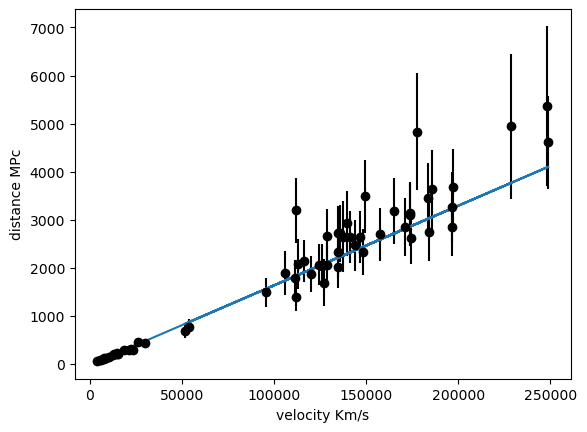

In [8]:
    


data = ascii.read('SNIafull.dat')
c=299792 #km/s
z=data['z']
v=c*z #km/s
M=data['mag']
d=(10**(((M+19)/5)+1))/(1000000)  #MPc
exponetal_uncert=np.sqrt((data['e_mag']**2)+(0.4**2))/5
derr=((10**(((M+19)/5)+1))/(1000000))*np.log(10)*exponetal_uncert #np.log is the natural log

m_leastsquares,b_leastsquares=least_squares(v,d,derr)
d_new=m_leastsquares*v+b_leastsquares

plt.errorbar(v,d,yerr=derr,fmt='ko')
plt.plot(v,d_new)

plt.xlabel('velocity Km/s')
plt.ylabel('distance MPc')
print("least squares Hubbles constant",1/m_leastsquares)


Text(0, 0.5, 'Residual distance MPc')

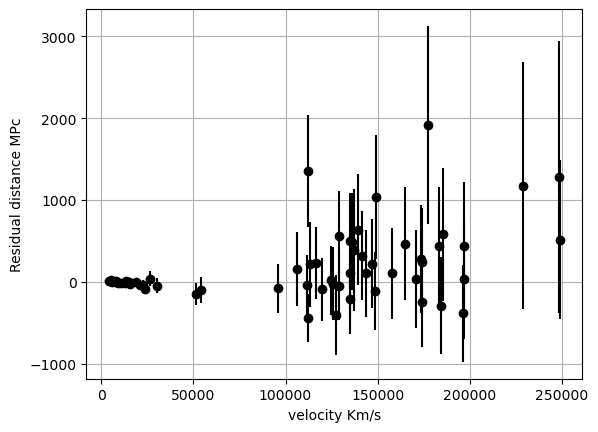

In [9]:
plt.errorbar(v,d-d_new,yerr=derr,fmt='ko')

plt.grid()
plt.xlabel('velocity Km/s')
plt.ylabel('Residual distance MPc')

Now, we are going to fit the data using two different models: a massless universe where the distance is related to the redshift according to $d=\frac{cz}{H_0}(1+\frac{z}{2})$, and a mass-dominated universe, where the relation is given by $d=\frac{2c}{H_0}(1+z-\sqrt{1+z})$.

**Exercise 2:** Define the functions for both models. Generate a grid of $H_0$ values over a reasonable range centered on the value determined previously. Subsequently, calculate the $\chi^2$ value for each point on the grid for both models and the simple linear model above, plot the value of $\chi^2$ as a function of $H_0$ and determine both the value of $H_0$ that minimises $\chi^2$ and the mininmum value of $\chi^2$.

min chi^2 is 30.592193013203474
at H0 of 68.62
+ -1.87
+ 1.97


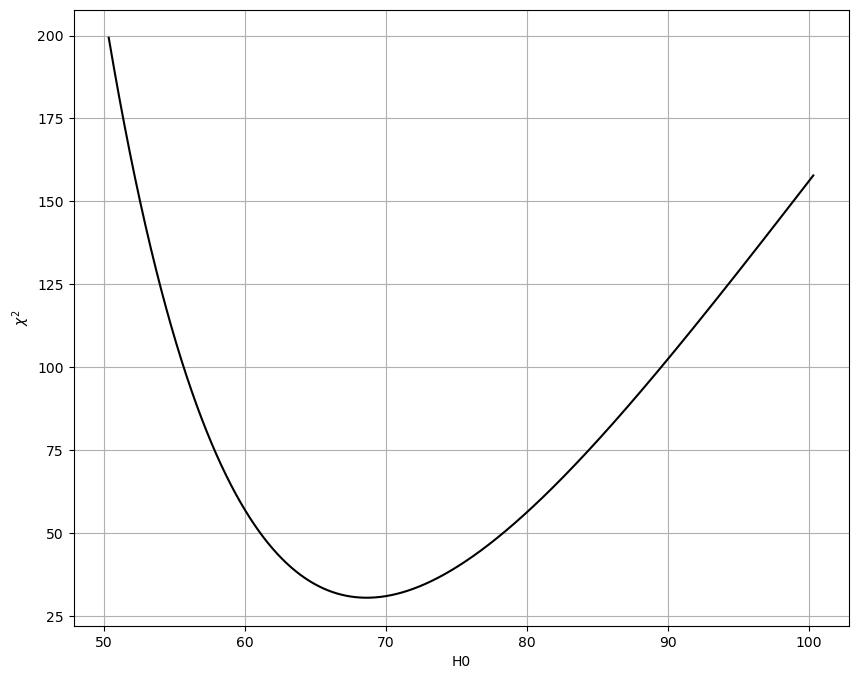

In [10]:
#need to do uncertainties

#mass dominated model
def model_mass(z,H0):
    d=((2*c)/H0)*(1+z-(np.sqrt(1+z)))
    return d
    #H0_mdom=((2*c)/d)*(1+z-(np.sqrt(1+z)))
  
c=299792
H0_orig=1/m_leastsquares

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2massdomgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2massdomgrid[i]=np.sum(((d-model_mass(z,H0))**2)/derr**2)

        
fig,ax=plt.subplots(1 , figsize=(10,8))
ax.plot(H0_grid,X2massdomgrid,'k')
plt.grid()
plt.xlabel('H0')
plt.ylabel('$\chi^2$')
print('min chi^2 is',np.min(X2massdomgrid))

min_index = np.argmin(X2massdomgrid) # array index of min value
H0_mdom=H0_grid[min_index]
print("at H0 of", "{:.2f}".format(H0_grid[min_index]))

for i,X2 in enumerate(X2massdomgrid):
    if (X2-np.min(X2massdomgrid))>0.995 and (X2-np.min(X2massdomgrid))<1.005:
        X2index=np.where(X2massdomgrid==X2)
        uncert=H0_grid[X2index]-H0_grid[min_index]
        print("+","{:.2f}".format(float(uncert)))

min $\chi^2$ is 23.785867810491926
at H0 of 74.26
+ -2.02
+ 2.13


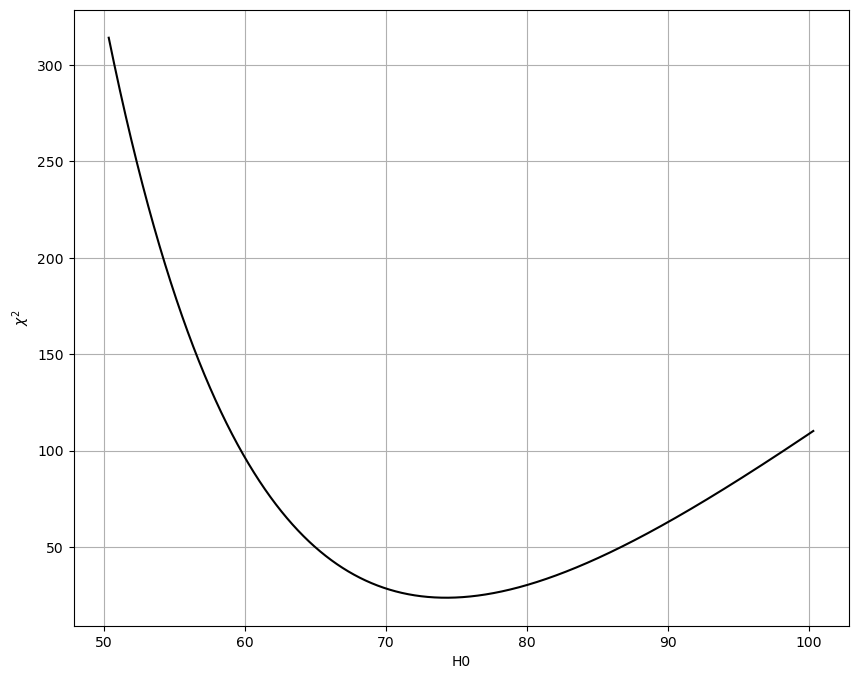

In [11]:
#massless model
def model_massless(z,H0):
    d=((c*z)/H0)*(1+(z/2))
    return d
    
  
c=299792
H0_orig=1/m_leastsquares

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2masslessgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2masslessgrid[i]=np.sum(((d-model_massless(z,H0))**2)/derr**2)

        
fig,ax=plt.subplots(1 , figsize=(10,8))
ax.plot(H0_grid,X2masslessgrid,'k')
plt.grid()
plt.xlabel('H0')
plt.ylabel('$\chi^2$')
print('min $\chi^2$ is',np.min(X2masslessgrid))

min_index = np.argmin(X2masslessgrid) # array index of min value
H0_mless=H0_grid[min_index]
print("at H0 of", "{:.2f}".format(H0_mless))

for i,X2 in enumerate(X2masslessgrid):
    if (X2-np.min(X2masslessgrid))>0.995 and (X2-np.min(X2masslessgrid))<1.005:
        X2index=np.where(X2masslessgrid==X2)
        uncert=H0_grid[X2index]-H0_grid[min_index]
        print("+","{:.2f}".format(float(uncert)))

**Exercise 3:** Comment on which model fits the data best based on the minimum $\chi_2$ value, and whether each of the models provide an acceptable fit by comparing it to the cumulative $\chi^2$ distrinbution function which you can get from by importing chi2 from scipy.stats. You can look up the help page by using the ? (e.g. ?chi2.cdf, you may also want to look at the help page of the package by typing ?chi2 in order to see how you can enter the degrees of freedom). 

In [12]:

from scipy.stats import chi2
a=chi2.cdf(np.min(X2masslessgrid),d.shape[0]-1)  #massless model works best 
print("massless=",a) # % chance that it is caused by random noise
b=chi2.cdf(np.min(X2massdomgrid),d.shape[0]-1)
print("massdom=",b) # below 5% is valid

# therefore not dominated by noise
# Both models have a very low chi-squared, the value you get from the cumulative distribution function supports this
#(you get a very small number).
#The low chi-squared values indicate that the uncertainties are likely over-estimated

massless= 1.2084135484781607e-05
massdom= 0.0008116142000339527


We can now try a more advanced model based on a flat universe. We are going to use the FlatLambdaCDM package from astropy.cosmology. Below is a simple example of how you use this package. 

In [13]:
#Example for how to calculate the distance for a given z, H0 and Omega0
H0=72.       #km/s/MPc
Omega0=1.0  #Matter dominated universe
z_trial=0.35  #z for this demonstration
cosmo=FlatLambdaCDM(H0,Omega0)    #Initialise the cosmology with the 
print(cosmo.luminosity_distance(0.35))    #Print the distance including units.  
print(cosmo.luminosity_distance(0.35).value)   #Print the distance excluding units.


1566.4571987284469 Mpc
1566.4571987284469


**Note:** By default the cosmo.luminosity_distance returns the results as a _Quantity_ which includes units through astropy.units. If you use this directly, you must ensure that the data you are fitting has the correct units (you can take a look at https://docs.astropy.org/en/stable/units/ to see how that works). Alternatively, you can use the '.value' options to only return the numerical value(s). 
Also note that $z$ can be either a scalar (as in the example above) or an array

**Exercise 4:** Now, try and make a function that takes both the redshift, a value for $H_0$ and a value for $\Omega_0$ and returns the distance. Use this function to make a plot of the distance as a function of the redshift for a unifrom range of redshifts between 0 and 2 for several different values of $H_0$ and $\Omega_0$.

(If you want more information on the package, you can either use the ? or go to the astropy webpages at https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html and https://docs.astropy.org/en/stable/api/astropy.cosmology.FLRW.html#astropy.cosmology.FLRW.luminosity_distance)

Text(0, 0.5, 'distance MPc')

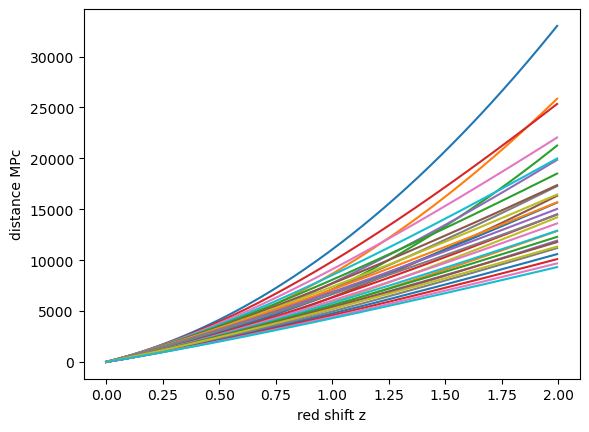

In [14]:

z_test=np.arange(0,2,0.005)
Omega0_grid=np.arange(0,1.0,0.1)
H0_grid1=np.arange(H0_mless-20,H0_mless+20,15)
for i,Omega0 in enumerate(Omega0_grid):
    for k,H0 in enumerate(H0_grid1):
        cosmo=FlatLambdaCDM(H0,Omega0)
        plt.plot(z_test,cosmo.luminosity_distance(z_test).value)

plt.xlabel('red shift z')
plt.ylabel('distance MPc')

In [15]:
?np.argmin

**Exercise 5:** Now create a grid sampling $\Omega_0$ between 0 (no matter) and 1. (matter dominated) and $H_0$ between your best value above -20 km/s/MPc and the best value above +20 km/sec/MPc, and for each combination of $\Omega_0$ and $H_0$ calculate the $\chi^2$.  Find the minimum value of $\chi^2$ and the associated parameters. Determine the uncertainties on the parameters and test whether this model is a better fit to the data than the simple models above. 

**Note:** If you want to see what the $\chi^2$ map looks like, you can use plt.pcolormesh(x,y,grid) to show a 2d surface plot. You may need to change the colorscale by setting the minimum and maximum value of the grid show by using vmin= and vmax=, respectively.



In [16]:
z=data['z']
Omega0_grid=np.arange(0,1.0,0.01)
H0_grid1=np.arange(H0_mless-20,H0_mless+20,0.5)

chi2grid=np.empty([H0_grid1.shape[0],Omega0_grid.shape[0]])

for i,Omega0 in enumerate(Omega0_grid):
    for k,H0 in enumerate(H0_grid1):
        cosmo=FlatLambdaCDM(H0,Omega0)
        dis=cosmo.luminosity_distance(z).value
        chi2grid[k][i]=np.sum(((d-dis)**2)/derr**2)



In [17]:
print("min chi2 is","{:.2f}".format(np.min(chi2grid)))
ind = np.unravel_index(np.argmin(chi2grid), chi2grid.shape)

p=np.min(chi2grid)
f=[]
g=[]
for i in np.arange(Omega0_grid.shape[0]-1): 
    for k in np.arange(H0_grid1.shape[0]-1):
        if (2.295>(chi2grid[k][i]-p)<2.305):
            f.append(i)      #min and max index value of Omega0
            g.append(k)     #min and max index value of H0
        

Ominind=min(f);Omaxind=max(f)
H0minind=min(g);H0maxind=max(g)
print("at Omega0 =",Omega0_grid[ind[1]],(Omega0_grid[Ominind]-Omega0_grid[ind[1]]),"+",(Omega0_grid[Omaxind]-Omega0_grid[ind[1]]))
LamdaCDMOmega0=Omega0_grid[ind[1]]

LamdaCDMH0=H0_grid1[ind[0]]
print("and H0 =","{:.2f}".format(LamdaCDMH0),(H0_grid1[H0minind]-H0_grid1[ind[0]]),"+",(H0_grid1[H0maxind]-H0_grid1[ind[0]]))
     # H0 max uncert is every wrong


min chi2 is 23.22
at Omega0 = 0.33 -0.23 + 0.32
and H0 = 76.76 -5.5 + 6.0


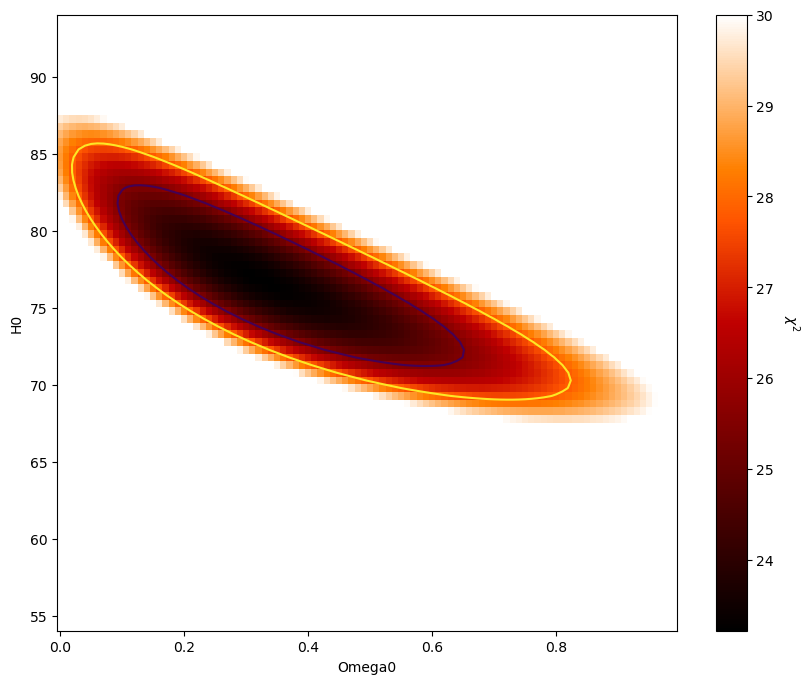

In [18]:
fig,ax=plt.subplots(1 , figsize=(10,8))
tmp=ax.pcolormesh(Omega0_grid,H0_grid1,chi2grid,cmap=plt.get_cmap('gist_heat'),vmax=30)
ax.set_xlabel('Omega0')
ax.set_ylabel('H0')
cbar=fig.colorbar(tmp)
cbar.set_label('$\chi^2$', labelpad=20, rotation=270)

g=[2.3+np.min(chi2grid),4.61+np.min(chi2grid)]
plt.contour(Omega0_grid,H0_grid1,chi2grid,g)

**Exercise 6:** Plot your data with the best fit model overplotted and make a separate plot of the residuals, as they can show if there is any problems with the model (you may also want to do this for the fits you did earlier, if you haven't done so already).

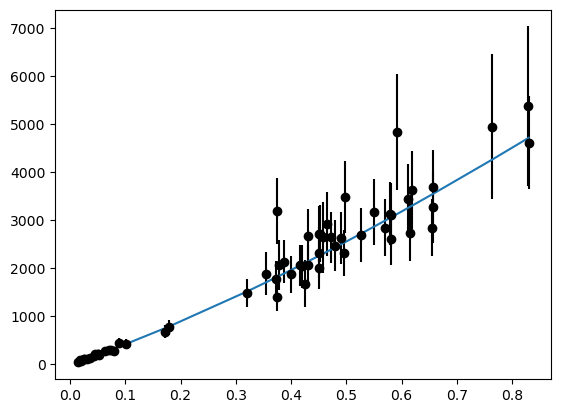

In [19]:
z=data['z']
plt.errorbar(z,d,yerr=derr,fmt='ko')
cosmo=FlatLambdaCDM(H0_grid1[ind[0]],Omega0_grid[ind[1]])
dis=cosmo.luminosity_distance(z).value
idx=np.argsort(z)

plt.plot(z[idx],dis[idx])


In [20]:
?plt.contour()

Object `plt.contour()` not found.


In the above fits, we used the entire range of the data, but as you have noticed, the data at higher redshifts is noisier than the data at lower redshifts. To see if we can get a better constraint at a lower redshifts, you want to only select the data with a redshift below $z=0.1$.

Numpy allows you to index an array with an array of equal length that contains boolean values (i.e. True or False), the example below shows how we can make such an array.

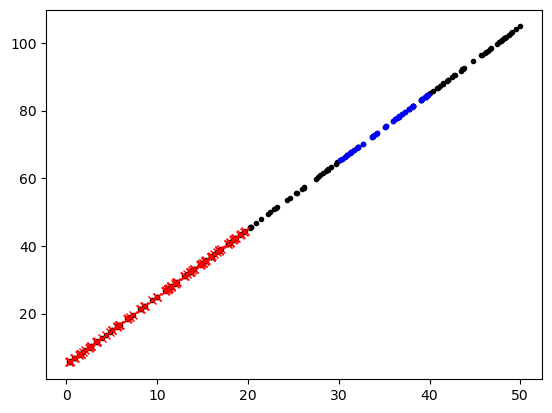

In [21]:
x=np.random.uniform(low=0.,high=50.,size=200)
y=x*2+5.  #make a y-array based on the x-'data'
idx_lt_20 = (x < 20)  #determine for each element of x whether it is larger or smaller than 20
x_lt_20=x[idx_lt_20]  #use the boolean array to only pick elements of x that are less than 20.
y_lt_20=y[idx_lt_20]  #select the corresponding elements from the y array

idx_gt_30_lt_40 = (x>30) & (x < 40)  #determine for each element of x whether it is between 30 and 40
x_gt_30_lt_40=x[idx_gt_30_lt_40]  #use the boolean array to only pick elements of x that are less than 20.
y_gt_30_lt_40=y[idx_gt_30_lt_40]  #select the corresponding elements from the y array

plt.plot(x,y,'k.')  #plot y vs x for the entire array as black circles
plt.plot(x_lt_20,y_lt_20,'rx')  #overplot the selected datapoints with x < 20 as red crosses.
plt.plot(x_gt_30_lt_40,y_gt_30_lt_40,'b.')  #overplot the selected datapoints with 30< x < 40 as blue dots.


**Exercise 7:** Select the data with a redshift below 0.1 and redo the $\chi^2$ fits for the different models, find the best fit parameters, and comment on the goodness of fit etc.

min chi2 is 3.937720317800678
at Omega0 = 0.0
and H0 = 77.76464125694274


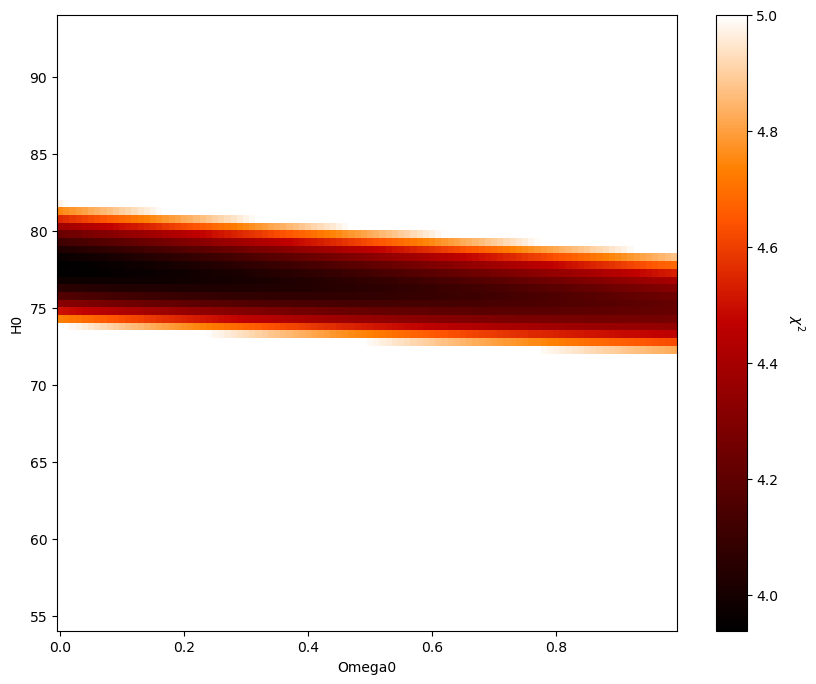

In [22]:
z=data['z']
restricted_z=(z<0.1)
zrestrict=z[restricted_z]
drestrict=d[restricted_z]
derr_restrict=derr[restricted_z]
Omega0_grid=np.arange(0.0,1.0,0.01)
H0_grid1=np.arange(H0_mless-20,H0_mless+20,0.5)

chi2grid=np.empty([H0_grid1.shape[0],Omega0_grid.shape[0]])

for i,Omega0 in enumerate(Omega0_grid):
    for k,H0 in enumerate(H0_grid1):
        cosmo=FlatLambdaCDM(H0,Omega0)
        dis=cosmo.luminosity_distance(zrestrict).value
        chi2grid[k][i]=np.sum(((drestrict-dis)**2)/derr_restrict**2)
        
print("min chi2 is",np.min(chi2grid))
ind = np.unravel_index(np.argmin(chi2grid), chi2grid.shape)
print("at Omega0 =",Omega0_grid[ind[1]])
Omega0LCDM=Omega0_grid[ind[1]]

H0LCDM=H0_grid1[ind[0]]
print("and H0 =",H0_grid1[ind[0]])

fig,ax=plt.subplots(1 , figsize=(10,8))
tmp=ax.pcolormesh(Omega0_grid,H0_grid1,chi2grid,cmap=plt.get_cmap('gist_heat'),vmax=5)
ax.set_xlabel('Omega0')
ax.set_ylabel('H0')
cbar=fig.colorbar(tmp)
cbar.set_label('$\chi^2$', labelpad=20, rotation=270)



min $\chi^2$ is 4.097569086997405
at H0 of 75.91
+ -3.62
+ 4.00
+ 4.01


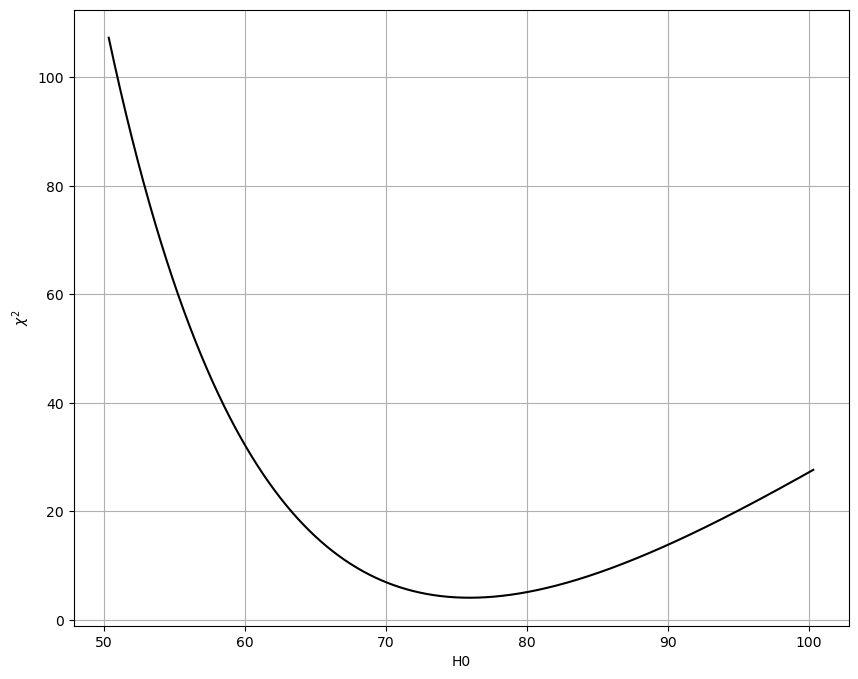

In [23]:
#massless model
def model_massless(z,H0):
    d=((c*z)/H0)*(1+(z/2))
    return d
    


c=299792
H0_orig=1/m_leastsquares

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2masslessgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2masslessgrid[i]=np.sum(((drestrict-model_massless(zrestrict,H0))**2)/derr_restrict**2)

        
fig,ax=plt.subplots(1 , figsize=(10,8))
ax.plot(H0_grid,X2masslessgrid,'k')
plt.grid()
plt.xlabel('H0')
plt.ylabel('$\chi^2$')
print('min $\chi^2$ is',np.min(X2masslessgrid))

min_index = np.argmin(X2masslessgrid) # array index of min value
restricted_H0_mless=H0_grid[min_index]
print("at H0 of", "{:.2f}".format(H0_grid[min_index]))

for i,X2 in enumerate(X2masslessgrid):
    if (X2-np.min(X2masslessgrid))>0.996 and (X2-np.min(X2masslessgrid))<1.002:
        X2index=np.where(X2masslessgrid==X2)
        uncert=H0_grid[X2index]-H0_grid[min_index]
        print("+","{:.2f}".format(float(uncert)))

min chi^2 is 4.219915704012641
at H0 of 75.06
+ -3.58
+ 3.96


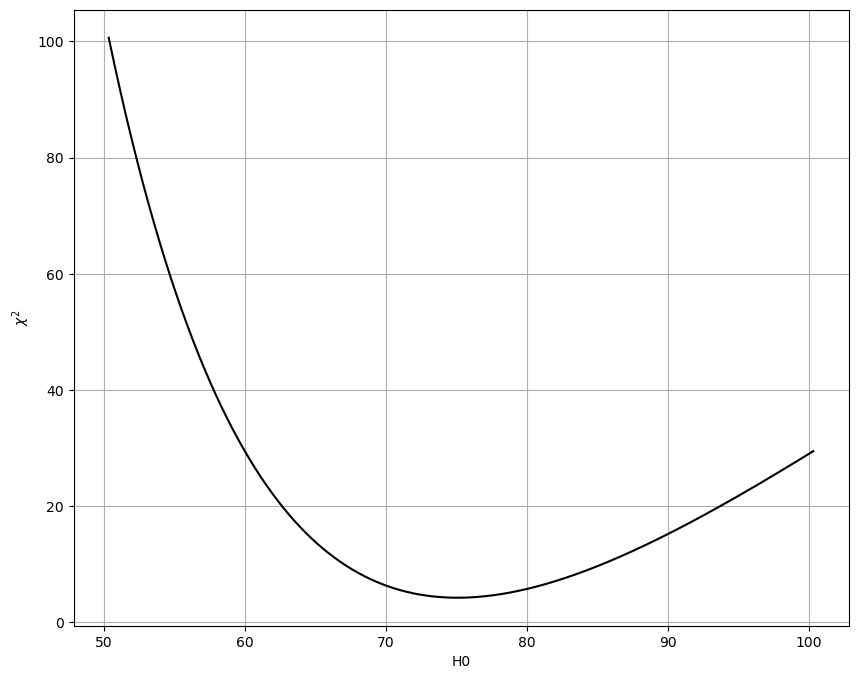

In [24]:
#mass dominated model
def model_mass(z,H0):
    d=((2*c)/H0)*(1+z-(np.sqrt(1+z)))
    return d
    

c=299792
H0_orig=1/m_leastsquares

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2massdomgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2massdomgrid[i]=np.sum(((drestrict-model_mass(zrestrict,H0))**2)/derr_restrict**2)

        
fig,ax=plt.subplots(1 , figsize=(10,8))
ax.plot(H0_grid,X2massdomgrid,'k')
plt.grid()
plt.xlabel('H0')
plt.ylabel('$\chi^2$')
print('min chi^2 is',np.min(X2massdomgrid))

min_index = np.argmin(X2massdomgrid) # array index of min value
restricted_H0_mdom=H0_grid[min_index]
print("at H0 of", "{:.2f}".format(H0_grid[min_index]))

for i,X2 in enumerate(X2massdomgrid):
    if (X2-np.min(X2massdomgrid))>0.997 and (X2-np.min(X2massdomgrid))<1.002:
        X2index=np.where(X2massdomgrid==X2)
        uncert=H0_grid[X2index]-H0_grid[min_index]
        print("+","{:.2f}".format(float(uncert)))

Depending on your results, you may have seen that the reduced $\chi^2$, defined as $\chi^2 / \nu$ with $\nu$ the number of degrees of freedom, can be larger than 1. This could indicate that we are underestimating our uncertainties on the data points, which would directly affect our results. To compensate for this, we could try to rescale each of the errorbars on the data points by a constant factor so that $\chi^2/\nu=1$. However, note that by doing so, you can no longer rely on the final $\chi^2$ value to do model testing. 

**Exercise 8:** Scale the uncertainties such that the reduced $\chi^2$ is equal to 1 for at least 2 of the models. Use the reduced $\chi^2$ to calculate the scaling and recalculate the best fit values and uncertainties for the parameters, and investigate the model selection.

In [25]:
z=data['z']


s=1.585
newderr=derr/s

Omega0_grid=np.arange(0.0,1.0,0.01)
H0_grid1=np.arange(H0_mless-20,H0_mless+20,0.5)

chi2grid=np.empty([H0_grid1.shape[0],Omega0_grid.shape[0]])

for i,Omega0 in enumerate(Omega0_grid):
    for k,H0 in enumerate(H0_grid1):
        cosmo=FlatLambdaCDM(H0,Omega0)
        dis=cosmo.luminosity_distance(z).value
        chi2grid[k][i]=np.sum(((d-dis)**2)/newderr**2)
        


print(np.min(chi2grid)/(d.shape[0]-2))

1.0057717532595307


In [26]:
#massless model
def model_massless(z,H0):
    d=((c*z)/H0)*(1+(z/2))
    return d
    

c=299792
H0_orig=1/m_leastsquares

s=1.58
newderr=derr/s

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2masslessgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2masslessgrid[i]=np.sum(((d-model_massless(z,H0))**2)/(newderr**2))


#fig,ax=plt.subplots(1 , figsize=(10,8))
#ax.plot(H0_grid,X2masslessgrid,'k')
#plt.grid()
#plt.xlabel('H0')
#plt.ylabel('$\chi^2$')
#print('min $\chi^2$ is',np.min(X2masslessgrid))

print(np.min(X2masslessgrid)/(d.shape[0]-1))

1.0064244135951192


In [27]:
#mass dominated model
def model_mass(z,H0):
    d=((2*c)/H0)*(1+z-(np.sqrt(1+z)))
    return d
    

c=299792
H0_orig=1/m_leastsquares
s=1.4
newderr=derr/s

H0_grid=np.arange(H0_orig-10,H0_orig+40,.01)
X2massdomgrid=np.empty(H0_grid.shape[0])

for i,H0 in enumerate(H0_grid):
    X2massdomgrid[i]=np.sum(((d-model_mass(z,H0))**2)/newderr**2)

        
#fig,ax=plt.subplots(1 , figsize=(10,8))
#ax.plot(H0_grid,X2massdomgrid,'k')
#plt.grid()
#plt.xlabel('H0')
#plt.ylabel('$\chi^2$')
#print('min chi^2 is',np.min(X2massdomgrid))

print(np.min(X2massdomgrid)/(d.shape[0]-1))

1.016283022133539


Sometimes, using a standard function to fit the data can help as well. For instance, you can use curve_fit from scipy.optimize to get the best fit values. 

**Exercise 9:** Use _curve_fit_ from _scipy.optimize_ (you will need to import this) to fit all the models, and compare the results from _curve_fit_ to your results from doing the $\chi^2$ fitting. To see how to use _curve_fit_, import it, and in the cell below your import use the ? to find the help page.

massdom model H0: [68.62099193] 68.62464125694386
massless model H0: [74.26184234] 74.26464125694274
76.81441011679998 76.76464125694274
0.32405751161670193 0.33


Text(0, 0.5, 'distance MPc')

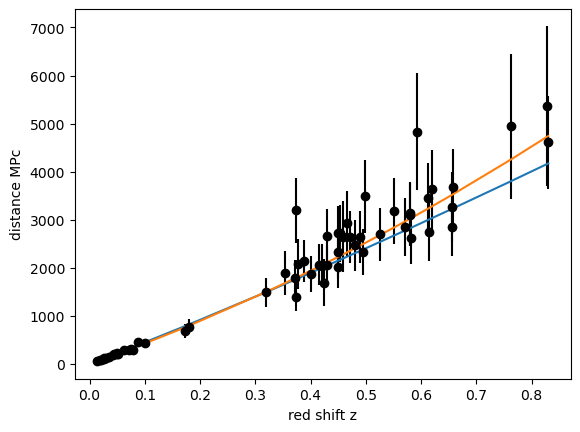

In [28]:
import scipy.optimize as so

#cosmo=FlatLambdaCDM(H0LCDM,Omega0LCDM)
#dis=cosmo.luminosity_distance(z).value
z=data['z']
def model_mass(z,H0):
    d=((2*c)/H0)*(1+z-(np.sqrt(1+z)))
    return d

def model_massless(z,H0):
    d=((c*z)/H0)*(1+(z/2))
    return d

def flat_lamdaCDM(z,H0,Omega0):
    cosmo=FlatLambdaCDM(H0,Omega0)
    d=cosmo.luminosity_distance(z).value
    return d

idx  = np.argsort(z)

plt.errorbar(z[idx],d[idx],yerr=derr[idx],fmt='ko')


u,v=so.curve_fit(model_mass,z[idx],d[idx],75,derr[idx])
print("massdom model H0:",u,H0_mdom)
plt.plot(z[idx],model_mass(z[idx],u))


u,v=so.curve_fit(model_massless,z[idx],d[idx],75,derr[idx])
print("massless model H0:",u,H0_mless)
plt.plot(z[idx],model_massless(z[idx],u))

u,v=so.curve_fit(flat_lamdaCDM,z[idx],d[idx],[75,0.5],sigma=derr[idx])
a,b=u
print(a,LamdaCDMH0)
print(b,LamdaCDMOmega0)
#plt.plot(z[idx],flat_lamdaCDM(z[idx],a,b))

plt.xlabel('red shift z')
plt.ylabel('distance MPc')